In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tfidf_gene/scikitlearn/default/1/tfidf .pkl
/kaggle/input/viral-and-nonviral-gene/virus.fasta
/kaggle/input/viral-and-nonviral-gene/plasmid.fasta
/kaggle/input/viral-and-nonviral-gene/bacteria.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Chikungunya_virus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001263_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Zika_virus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001733_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Pseudomonas_aeruginosa.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_011100_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Escherichia_coli.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Staphylococcus_aureus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/NC_001422_1.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Human_papillomavirus.fasta
/kaggle/input/viral-and-nonviral-gene/viral_gene2/Clostridium_botul

In [8]:
!pip install --upgrade pip numpy scikit-learn pandas keras tensorflow torch dill matplotlib seaborn lightgbm

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached numpy-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached torch-2.6.0-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached lightgbm-4.6.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metad

In [9]:
pip install biopython

  Using cached biopython-1.85-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached biopython-1.85-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import dill

In [11]:
zika_virus = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Zika_virus.fasta", "r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file, "fasta"):
        zika_virus.append(str(seq_record.seq))
chikungunya_virus = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Chikungunya_virus.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        chikungunya_virus.append(str(seq_record.seq))
herpes_simplex_virus_1 = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Herpes_simplex_virus_1.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        herpes_simplex_virus_1.append(str(seq_record.seq))
human_mastadenovirus_c = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Human_mastadenovirus_C.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        human_mastadenovirus_c.append(str(seq_record.seq))
human_papillomavirus = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Human_papillomavirus.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        human_papillomavirus.append(str(seq_record.seq))
influenza_a_virus = []
with open("/kaggle/input/viral-and-nonviral-gene/viral_gene2/Influenza_A_virus.fasta","r") as fasta_file:
    for seq_record in SeqIO.parse(fasta_file,"fasta"):
        influenza_a_virus.append(str(seq_record.seq))
print(len(influenza_a_virus))

1500


In [12]:
from collections import Counter

def gc_content(sequence):
    g_count = sequence.count('G')
    c_count = sequence.count('C')
    total_bases = len(sequence)
    gc_percentage = (g_count + c_count) / total_bases * 100
    return gc_percentage

def at_content(sequence):
    a_count = sequence.count('A')
    t_count = sequence.count('T')
    total_bases = len(sequence)
    at_percentage = (a_count + t_count) / total_bases * 100
    return at_percentage

def kmer_frequencies(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    kmer_counts = Counter(kmers)
    return kmer_counts

def molecular_weight(sequence):
    nucleotide_weights = {
        'A': 331.2,
        'T': 322.2,
        'C': 307.2,
        'G': 347.2
    }
    weight = sum(nucleotide_weights[nuc] for nuc in sequence if nuc in nucleotide_weights)
    return weight

def hydrophobicity(sequence):
    hydrophobic_nucleotides = {'A', 'T'}
    hydrophilic_nucleotides = {'C', 'G'}
    hydrophobic_score = sum(1 for nuc in sequence if nuc in hydrophobic_nucleotides)
    hydrophilic_score = sum(1 for nuc in sequence if nuc in hydrophilic_nucleotides)
    return hydrophobic_score / len(sequence), hydrophilic_score / len(sequence)

def dinucleotide_frequencies(seq):
    dinucs = [seq[i:i+2] for i in range(len(seq)-1)]
    freq = Counter(dinucs)
    return {dinuc: freq[dinuc] / len(dinucs) for dinuc in freq}

def sequence_entropy(seq):
    freq = Counter(seq)
    probs = [freq[base] / len(seq) for base in freq]
    return -sum(p * np.log2(p) for p in probs)


def Kmers_contribution(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

In [13]:
virus_sequences = {
    "zika_virus": zika_virus,
    "influenza_a_virus": influenza_a_virus,
    "chikungunya_virus": chikungunya_virus,
    "human_mastadenovirus_c": human_mastadenovirus_c,
    "human_papillomavirus": human_papillomavirus,
    "herpes_simplex_virus_1": herpes_simplex_virus_1,
}

In [14]:
df_virus = pd.DataFrame(columns=['Sequence', 'GC', 'AT', 'Molecular Wt', 'Hydrophobic Score', 'Hydrophilic Score', 'Sequence Entropy', 'Organism'])

In [15]:
import dill
tfidf_path = "/kaggle/input/tfidf_gene/scikitlearn/default/1/tfidf .pkl"
with open(tfidf_path, "rb") as f:
    tfidf = dill.load(f)

In [16]:
for name, sequences in virus_sequences.items():
    for seq in sequences:
        seq = seq.replace('\n', '')
        words = Kmers_contribution(seq)
        joined_words = ' '.join(words)
        gc = gc_content(seq)
        at = at_content(seq)
        mw = molecular_weight(seq)
        hydrophobic_score, hydrophilic_score = hydrophobicity(seq)
        s_entropy = sequence_entropy(seq)
        
        # Append data to the DataFrame
        df_virus.loc[len(df_virus)] = [joined_words, gc, at, mw, hydrophobic_score, hydrophilic_score, s_entropy, name]

# Check the final shape of the DataFrame
print(df_virus.shape)

(9000, 8)


In [17]:
df_virus.sample(10)

,Sequence,GC,AT,Molecular Wt,Hydrophobic Score,Hydrophilic Score,Sequence Entropy,Organism
6695,acctgt cctgta ctgtac tgtacc gtacca taccat acca...,39.595564,60.404436,502224.6,0.604044,0.395956,1.965630,human_papillomavirus
1787,caaacc aaacca aaccat accatt ccattt catttg attt...,42.659758,57.340242,759974.2,0.573402,0.426598,1.962134,influenza_a_virus
2731,atggaa tggaag ggaaga gaagat aagatt agattt gatt...,41.794514,58.205486,706129.2,0.582055,0.417945,1.963455,influenza_a_virus
5290,gactac actacc ctacct tacctt accttt cctttc cttt...,52.760736,47.239264,264801.0,0.472393,0.527607,1.980916,human_mastadenovirus_c
1889,atggat tggatg ggatgt gatgtc atgtca tgtcaa gtca...,41.512753,58.487247,746426.8,0.584872,0.415128,1.954797,influenza_a_virus
4407,actggg ctgggt tgggta gggtag ggtagg gtaggg tagg...,46.940879,45.535463,3232433.0,0.455355,0.469409,2.224075,chikungunya_virus
7961,atgcct tgcctt gccttt cctttc ctttcg tttcgt ttcg...,63.341158,36.658842,834800.2,0.366588,0.633412,1.946630,herpes_simplex_virus_1
8127,atcgga tcggac cggact ggactg gactgg actgga ctgg...,67.757009,32.242991,70047.8,0.322430,0.677570,1.870212,herpes_simplex_virus_1
6056,atgcac tgcacc gcacca caccaa accaaa ccaaaa caaa...,39.897698,60.102302,256469.4,0.601023,0.398977,1.962366,human_papillomavirus
6800,tttgtt ttgtta tgttac gttact ttactg tactgt actg...,32.374101,67.625899,45551.8,0.676259,0.323741,1.904631,human_papillomavirus


In [18]:
from sklearn.preprocessing import LabelEncoder
le_virus = LabelEncoder()
df_virus['Organism'] = le_virus.fit_transform(df_virus['Organism'])

In [19]:
dict(zip(le_virus.classes_, range(len(le_virus.classes_))))

{'chikungunya_virus': 0,
 'herpes_simplex_virus_1': 1,
 'human_mastadenovirus_c': 2,
 'human_papillomavirus': 3,
 'influenza_a_virus': 4,
 'zika_virus': 5}

In [20]:
sequence_features_virus = tfidf.transform(df_virus['Sequence']).toarray()
sequence_feature_names_virus = tfidf.get_feature_names_out()
numeric_features_virus = df_virus.drop(columns=['Sequence', 'Organism']).values
combined_features_virus = np.hstack((sequence_features_virus, numeric_features_virus))
target_virus = df_virus['Organism']
x_dense_virus = pd.DataFrame(combined_features_virus, columns=sequence_feature_names_virus.tolist() + df_virus.drop(columns=['Sequence', 'Organism']).columns.tolist())
x_dense_virus.sample(10)

,aaaaaa,aaaaac,aaaaag,aaaaak,aaaaam,aaaaan,aaaaar,aaaaat,aaaaaw,aaaaay,...,yytgak,yytgcg,yytgct,yytggc,GC,AT,Molecular Wt,Hydrophobic Score,Hydrophilic Score,Sequence Entropy
6946,0.000000,0.106715,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,40.880503,59.119497,1.562494e+05,0.591195,0.408805,1.963259
6589,0.053897,0.035340,0.016897,0.0,0.0,0.0,0.0,0.071279,0.0,0.0,...,0.0,0.0,0.0,0.0,37.243207,62.756793,4.941298e+05,0.627568,0.372432,1.951074
1394,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018334,0.0,0.0,...,0.0,0.0,0.0,0.0,50.539811,49.460189,4.871284e+05,0.494602,0.505398,1.987514
6385,0.054811,0.017970,0.017184,0.0,0.0,0.0,0.0,0.108732,0.0,0.0,...,0.0,0.0,0.0,0.0,37.866667,62.133333,4.908270e+05,0.621333,0.378667,1.956504
1013,0.000000,0.000000,0.084597,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,43.137255,56.862745,3.366240e+04,0.568627,0.431373,1.884718
6100,0.053923,0.017678,0.016905,0.0,0.0,0.0,0.0,0.017828,0.0,0.0,...,0.0,0.0,0.0,0.0,37.491749,62.508251,4.958790e+05,0.625083,0.374917,1.953514
5034,0.000000,0.000000,0.025214,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,52.760736,47.239264,2.648010e+05,0.472393,0.527607,1.980916
3997,0.008100,0.035850,0.026664,0.0,0.0,0.0,0.0,0.016068,0.0,0.0,...,0.0,0.0,0.0,0.0,50.764526,49.235474,3.640528e+06,0.492355,0.507645,1.988122
1334,0.026901,0.026458,0.054216,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,51.187804,48.812196,3.513789e+06,0.488122,0.511878,1.987024
3011,0.016055,0.019738,0.015100,0.0,0.0,0.0,0.0,0.019905,0.0,0.0,...,0.0,0.0,0.0,0.0,50.999731,49.000269,3.652307e+06,0.490003,0.509997,1.988800


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter entropy values by organism type
df_entropy_0 = df_virus[df_virus['Organism'] == 0][['Sequence Entropy']].reset_index(drop=True)
df_entropy_1 = df_virus[df_virus['Organism'] == 1][['Sequence Entropy']].reset_index(drop=True)
df_entropy_2 = df_virus[df_virus['Organism'] == 2][['Sequence Entropy']].reset_index(drop=True)
df_entropy_3 = df_virus[df_virus['Organism'] == 3][['Sequence Entropy']].reset_index(drop=True)
df_entropy_4 = df_virus[df_virus['Organism'] == 4][['Sequence Entropy']].reset_index(drop=True)
df_entropy_5 = df_virus[df_virus['Organism'] == 5][['Sequence Entropy']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each class
sns.kdeplot(df_entropy_0['Sequence Entropy'], label="Chikungunya Virus", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_1['Sequence Entropy'], label="Herpes Simplex Virus", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_2['Sequence Entropy'], label="Human Mastadenovirus C", color='red', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_3['Sequence Entropy'], label="Human Papillomavirus", color='black', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_4['Sequence Entropy'], label="Influenza A Virus", color='orange', linewidth=2, alpha=0.6)
sns.kdeplot(df_entropy_5['Sequence Entropy'], label="Zika Virus", color='purple', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Sequence Entropy")
plt.ylabel("Density")
plt.title("Density Distribution of Sequence Entropy by Organism")
plt.legend()
plt.show()

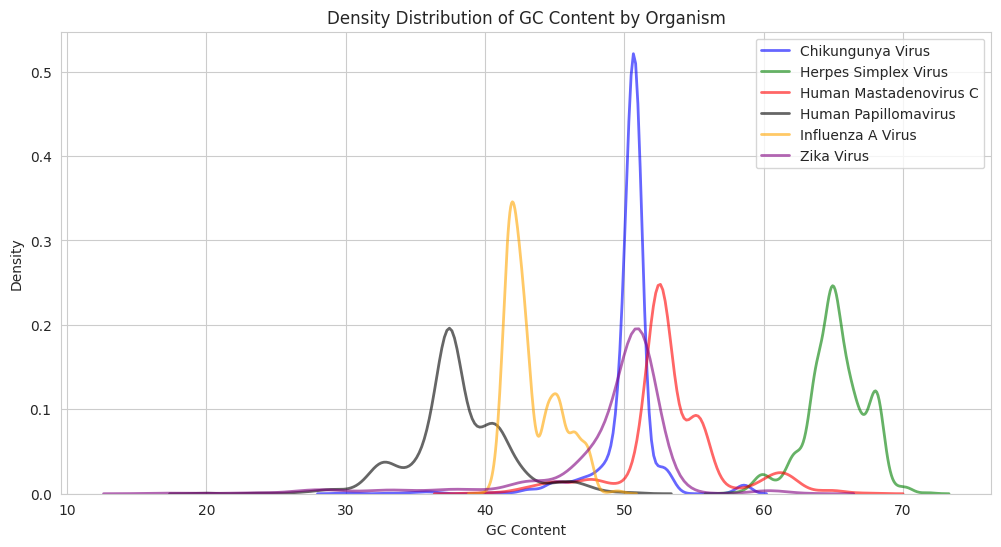

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter GC content values by organism type
df_gc_0 = df_virus[df_virus['Organism'] == 0][['GC']].reset_index(drop=True)
df_gc_1 = df_virus[df_virus['Organism'] == 1][['GC']].reset_index(drop=True)
df_gc_2 = df_virus[df_virus['Organism'] == 2][['GC']].reset_index(drop=True)
df_gc_3 = df_virus[df_virus['Organism'] == 3][['GC']].reset_index(drop=True)
df_gc_4 = df_virus[df_virus['Organism'] == 4][['GC']].reset_index(drop=True)
df_gc_5 = df_virus[df_virus['Organism'] == 5][['GC']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each virus type
sns.kdeplot(df_gc_0['GC'], label="Chikungunya Virus", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_1['GC'], label="Herpes Simplex Virus", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_2['GC'], label="Human Mastadenovirus C", color='red', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_3['GC'], label="Human Papillomavirus", color='black', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_4['GC'], label="Influenza A Virus", color='orange', linewidth=2, alpha=0.6)
sns.kdeplot(df_gc_5['GC'], label="Zika Virus", color='purple', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("GC Content")
plt.ylabel("Density")
plt.title("Density Distribution of GC Content by Organism")
plt.legend()
plt.show()


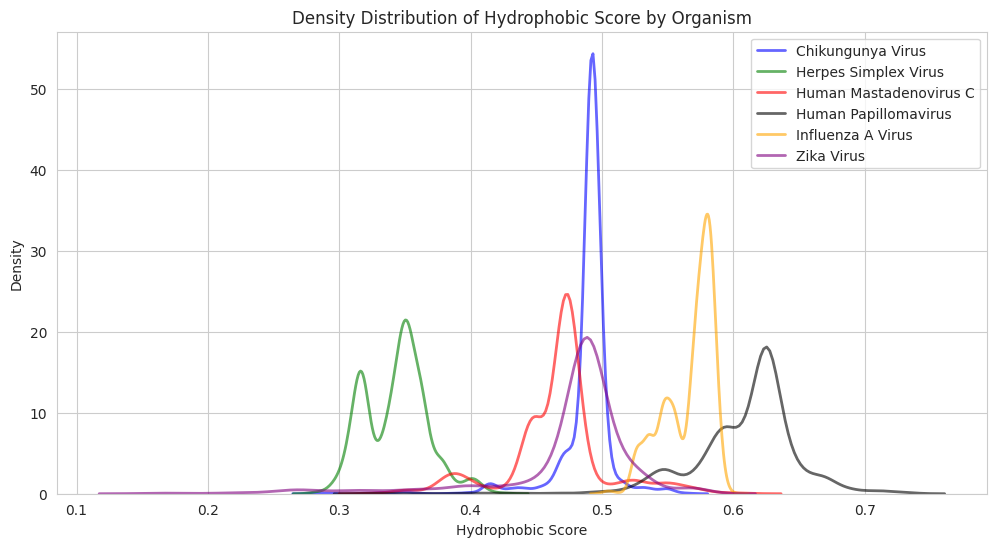

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Hydrophobic Score values by organism type
df_hydro_0 = df_virus[df_virus['Organism'] == 0][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_1 = df_virus[df_virus['Organism'] == 1][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_2 = df_virus[df_virus['Organism'] == 2][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_3 = df_virus[df_virus['Organism'] == 3][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_4 = df_virus[df_virus['Organism'] == 4][['Hydrophobic Score']].reset_index(drop=True)
df_hydro_5 = df_virus[df_virus['Organism'] == 5][['Hydrophobic Score']].reset_index(drop=True)

# Set style
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# KDE plots for each virus type
sns.kdeplot(df_hydro_0['Hydrophobic Score'], label="Chikungunya Virus", color='blue', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_1['Hydrophobic Score'], label="Herpes Simplex Virus", color='green', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_2['Hydrophobic Score'], label="Human Mastadenovirus C", color='red', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_3['Hydrophobic Score'], label="Human Papillomavirus", color='black', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_4['Hydrophobic Score'], label="Influenza A Virus", color='orange', linewidth=2, alpha=0.6)
sns.kdeplot(df_hydro_5['Hydrophobic Score'], label="Zika Virus", color='purple', linewidth=2, alpha=0.6)

# Labels and title
plt.xlabel("Hydrophobic Score")
plt.ylabel("Density")
plt.title("Density Distribution of Hydrophobic Score by Organism")
plt.legend()
plt.show()


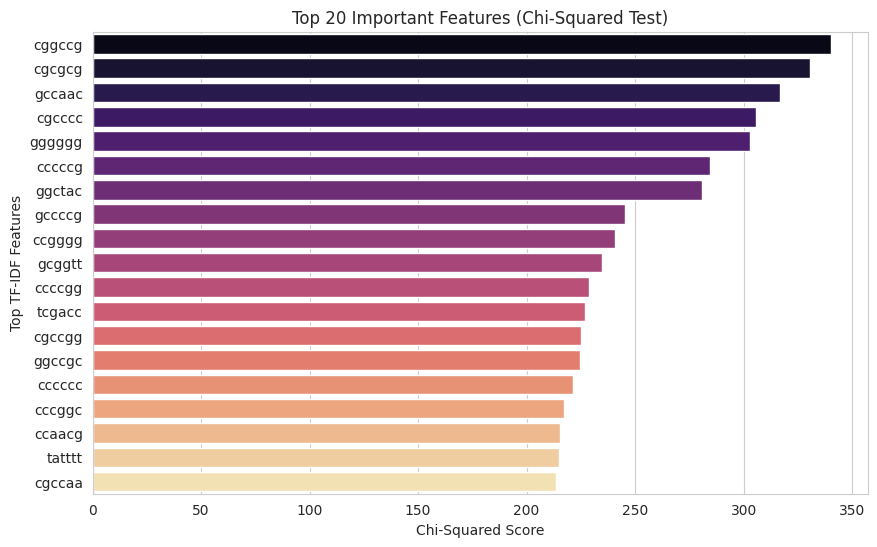

In [18]:
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out features with zero variance to avoid divide-by-zero errors
nonzero_var_idx = np.where(sequence_features_virus.sum(axis=0) > 0)[0]
filtered_features = sequence_features_virus[:, nonzero_var_idx]
filtered_feature_names = [sequence_feature_names_virus[i] for i in nonzero_var_idx]

# Compute chi-squared scores
chi2_scores, _ = chi2(filtered_features, target_virus)

# Sort features by chi-squared score
sorted_idx = np.argsort(chi2_scores)[::-1]  # Descending order
top_n = 20  # Number of top features to visualize
top_features = [filtered_feature_names[i] for i in sorted_idx[:top_n]]
top_chi2 = chi2_scores[sorted_idx[:top_n]]

# Drop "nnnnnn" if it exists
if "nnnnnn" in top_features:
    drop_idx = top_features.index("nnnnnn")
    top_features.pop(drop_idx)
    top_chi2 = np.delete(top_chi2, drop_idx)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chi2, y=top_features, hue=top_features, dodge=False, palette="magma")

plt.xlabel("Chi-Squared Score")
plt.ylabel("Top TF-IDF Features")
plt.title("Top 20 Important Features (Chi-Squared Test)")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


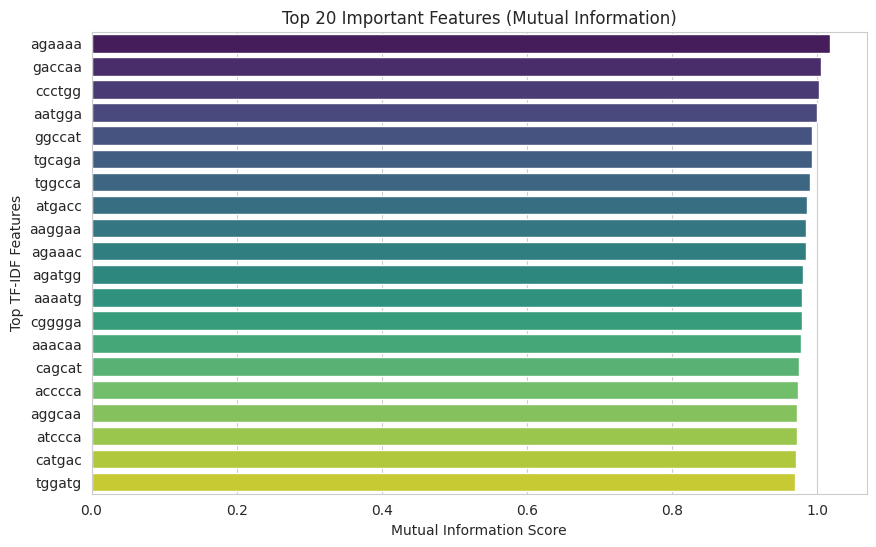

In [19]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute Mutual Information scores
mi_scores = mutual_info_classif(sequence_features_virus, target_virus, discrete_features=False)

# Sort features by MI score
sorted_idx = np.argsort(mi_scores)[::-1]  # Descending order
top_n = 20  # Number of top features to visualize
top_features = [sequence_feature_names_virus[i] for i in sorted_idx[:top_n]]
top_mi = mi_scores[sorted_idx[:top_n]]

# Drop "nnnnnn" if it exists
if "nnnnnn" in top_features:
    drop_idx = top_features.index("nnnnnn")
    top_features.pop(drop_idx)
    top_mi = np.delete(top_mi, drop_idx)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mi, y=top_features, hue=top_features, dodge=False, palette="viridis")

plt.xlabel("Mutual Information Score")
plt.ylabel("Top TF-IDF Features")
plt.title("Top 20 Important Features (Mutual Information)")
plt.legend([],[], frameon=False)  # Hide legend
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
x_train_virus, x_test_virus, y_train_virus, y_test_virus = train_test_split(
    x_dense_virus, target_virus, test_size=0.2, random_state=42, stratify=target_virus
)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler_virus = StandardScaler()
x_train_virus = scaler_virus.fit_transform(x_train_virus)
x_test_virus = scaler_virus.transform(x_test_virus)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier
)
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Initialize Label Binarizer
label_binarize = LabelBinarizer()

# Define hyperparameters
common_params = {
    "n_estimators": 3000,
    "learning_rate": 0.03,
    "max_depth": 7,
    "subsample": 0.7,
    "max_features": "log2",
    "min_samples_split": 10,
    "min_samples_leaf": 5,
}

# Define classifiers with the same parameters where applicable
classifiers_params = {
    "Gradient Boosting": GradientBoostingClassifier(
        **common_params,
        n_iter_no_change=10,
        verbose=1,
        warm_start=True,
    ),
    "LightGBM": lgb.LGBMClassifier(
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=1000,
        max_depth=-1,
        objective="multiclass",
        metric="multi_logloss",
        verbose=-1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    "Logistic Regression": LogisticRegression(
        solver="lbfgs",
        max_iter=500,
        multi_class="multinomial",
        random_state=42,
    ),
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.05,
        objective="multi:softprob",
        eval_metric="mlogloss",
        use_label_encoder=False,
        verbosity=0
    ),
    "Naïve Bayes": GaussianNB()
}

In [36]:
def train_and_evaluate_models(x_train, y_train, x_test, y_test, classifiers):
    best_model = None
    best_model_name = ""
    best_test_accuracy = 0  # Store the best test accuracy

    for model_name, model in classifiers.items():
        model.fit(x_train, y_train)

        # Binarize labels if multiclass
        n_classes = len(np.unique(y_train))
        label_binarize.fit(y_train)  # Fit on training data
        y_train_bin = label_binarize.transform(y_train) if n_classes > 2 else y_train
        y_test_bin = label_binarize.transform(y_test) if n_classes > 2 else y_test

        # Training evaluation
        y_train_pred = model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_cm = confusion_matrix(y_train, y_train_pred)

        print(f"\nModel: {model_name} (Training Data)")
        print(f"Training Accuracy: {train_accuracy:.2f}")
        print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

        ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=np.unique(y_train)).plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name} (Training Data)')
        plt.grid(False)
        plt.show()

        # Test evaluation
        y_test_pred = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_cm = confusion_matrix(y_test, y_test_pred)

        print(f"\nModel: {model_name} (Test Data)")
        print(f"Test Accuracy: {test_accuracy:.2f}")
        print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

        ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=np.unique(y_test)).plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {model_name} (Test Data)')
        plt.grid(False)
        plt.show()

        # ROC Curve
        if hasattr(model, "predict_proba"):
            y_test_proba = model.predict_proba(x_test)

            plt.figure(figsize=(10, 5))

            if n_classes > 2:  # Multi-class classification
                for i in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

            else:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test, y_test_proba[:, 1])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve for {model_name}")
            plt.legend(loc="lower right")
            plt.show()
        
        # Select the best model
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_model = model
            best_model_name = model_name

    print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_test_accuracy:.2f}")
    return best_model

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.7219           0.0661            3.07m
         2           1.6243           0.1008            3.93m
         3           1.5477           0.0716            4.16m
         4           1.4828           0.0667            4.02m
         5           1.4086           0.0773            3.99m
         6           1.3478           0.0645            4.03m
         7           1.2996           0.0509            3.96m
         8           1.2553           0.0304            3.87m
         9           1.2148           0.0492            3.86m
        10           1.1650           0.0539            3.90m
        20           0.8378           0.0348            3.74m
        30           0.6218           0.0175            3.80m
        40           0.4749           0.0153            3.81m
        50           0.3731           0.0178            3.83m
        60           0.3035          -0.0034            3.82m
       

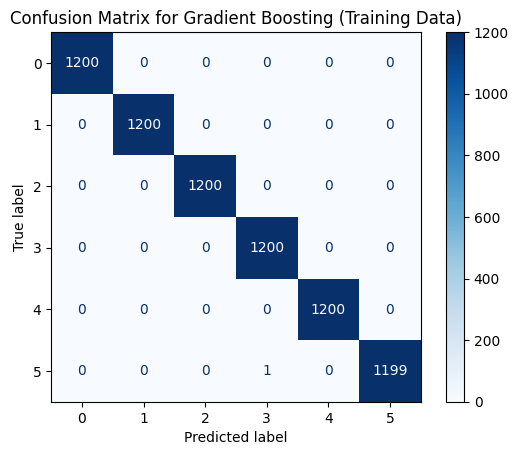


Model: Gradient Boosting (Test Data)
Test Accuracy: 1.00
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       300
           3       1.00      1.00      1.00       300
           4       1.00      1.00      1.00       300
           5       1.00      1.00      1.00       300

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



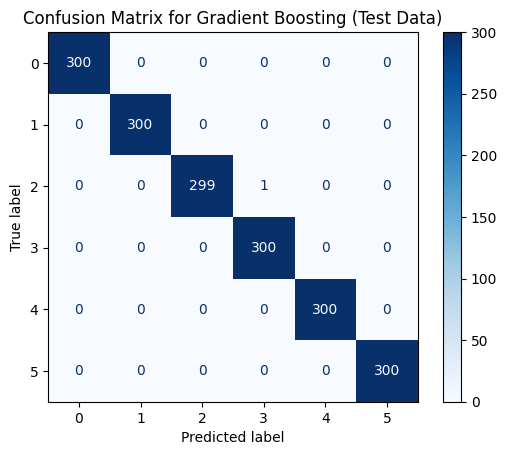

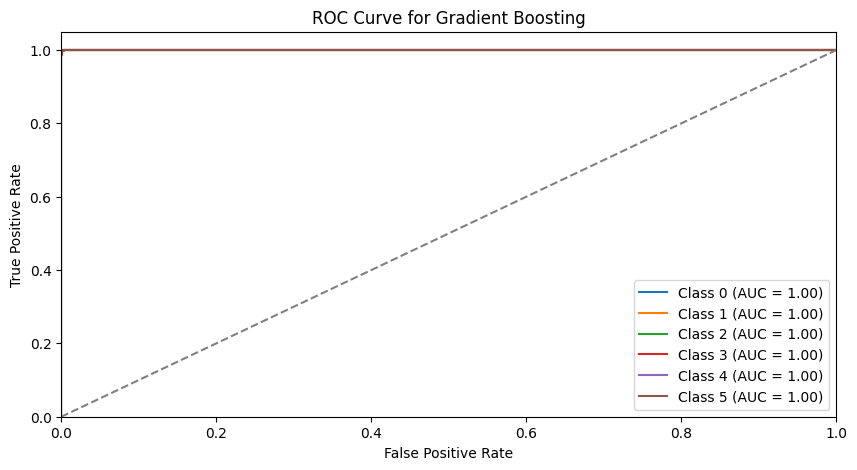


Best Model: Gradient Boosting with Test Accuracy: 1.00


In [37]:
best_model_virus = train_and_evaluate_models(x_train_virus, y_train_virus, x_test_virus, y_test_virus,classifiers={
    "Gradient Boosting": GradientBoostingClassifier(
        **common_params,
        n_iter_no_change=10,
        verbose=1,
        warm_start=True,
    ),
})